In [ ]:
!pip install researchpy

In [1]:
import seaborn as sns
import researchpy as rp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Simple T-Test

##### Simulating P-values

Suponhamos que você tenha um website com um banner de propaganda, e que 20% das pessoas que visitam o site clicam neste banner. A area de comunicação desenvolveu um novo banner e, ao implantar este novo banner, dos primeiros 30 clientes que o viram, 
11 pessoas clicaram no banner novo.

Como podemos descobrir se isso é um efeito aleatório ou um impacto real?

alpha --> 0.05  (significance level = 1-alpha = 95%)

In [38]:
p = 11/30
primeiros_30 = np.random.choice([0, 1], p=[1-p, p], size=30)

In [39]:
sum(primeiros_30)/30

0.3333333333333333

In [14]:
primeiros_30

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [15]:
primeiros_30.mean()

0.23333333333333334

In [16]:
dist_pop = np.array([np.mean(np.random.choice([0, 1], p=[0.8, 0.2], size=30)) for i in range(0, 1000)])

In [17]:
dist_pop[0:50]

array([0.23333333, 0.36666667, 0.16666667, 0.2       , 0.16666667,
       0.16666667, 0.3       , 0.16666667, 0.16666667, 0.13333333,
       0.36666667, 0.06666667, 0.16666667, 0.2       , 0.2       ,
       0.2       , 0.06666667, 0.2       , 0.36666667, 0.23333333,
       0.23333333, 0.23333333, 0.1       , 0.26666667, 0.2       ,
       0.13333333, 0.16666667, 0.16666667, 0.2       , 0.1       ,
       0.2       , 0.26666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.2       , 0.1       , 0.1       ,
       0.3       , 0.16666667, 0.3       , 0.2       , 0.23333333,
       0.2       , 0.16666667, 0.23333333, 0.2       , 0.1       ])

<AxesSubplot:ylabel='Count'>

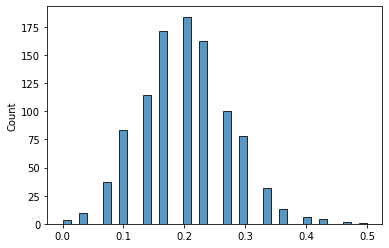

In [18]:
sns.histplot(dist_pop)

In [19]:
len(dist_pop[dist_pop >= p])/1000

0.026

Se a taxa real era de 20%, a chance de observarmos 11 cliques em 30 acessos (uma taxa de 36,67%) seria de 2,6%

In [20]:
from scipy import stats

In [21]:
cliques_novo_banner = [1] * 11 + [0] * (30-11)

In [58]:
p = 11/30
n = 30
n_1 = int(n*p)
n_0 = int(n - n_1)
cliques_novo_banner = [1] * n_1 + [0] * n_0

In [64]:
cliques_novo_banner

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [60]:
cliques_novo_banner[0:16]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [61]:
len(cliques_novo_banner)

30

In [62]:
np.mean(cliques_novo_banner)

0.36666666666666664

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, a média da amostra é a média da população.__
* __Alternative hypothesis (H1): u1 != u2, a média da amostra é diferente da média da população.__

O valor alfa é o valor abaixo do qual rejeitaremos a hipótese nula: caso o valor-p seja menor que alfa, concluíremos que a hipótese alternativa é a verdadeira.

In [63]:
stats.ttest_1samp(cliques_novo_banner, 0.2)

Ttest_1sampResult(statistic=1.8624981936987484, pvalue=0.07269244298315648)

# Paired T-Test

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv

This dataset contains blood pressure readings before and after an <b>intervention</b>. These are variables “bp_before” and “bp_after”.

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
 5   diff_      120 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 5.8+ KB


## Assumption check 

- [ ]  The samples are independently and randomly drawn

**AND**

- [ ]  The distribution of the residuals between the two groups should follow the normal distribution

**AND**

- [ ]  The variances between the two groups are equal

**OR**

- [ ]  Approximately equal sample sizes

https://www.youtube.com/watch?v=OyB_w4XNQ58&t=315s

### Checking Normal distribution by Q-Q plot graph
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

In [68]:
df['diff_'] = df['bp_before']-df['bp_after']

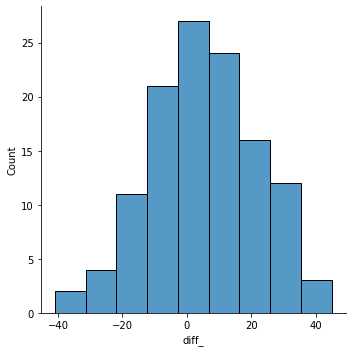

In [69]:
sns.displot(df['diff_'])

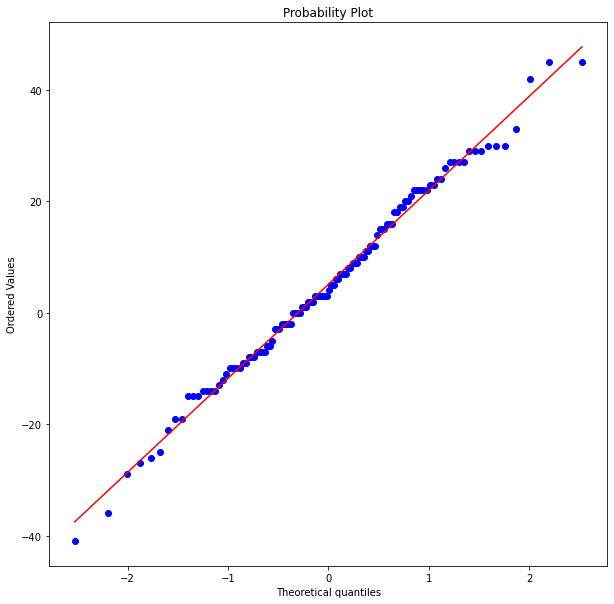

In [70]:
plt.figure(figsize=(10,10))
stats.probplot(df['diff_'], plot=plt)
plt.show()

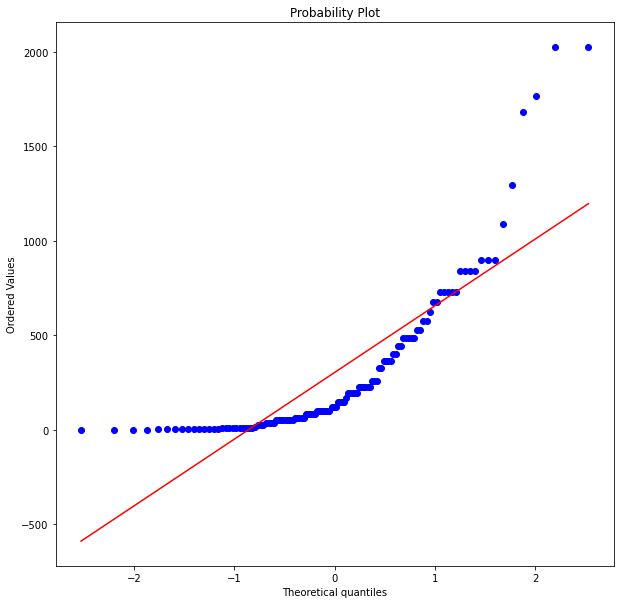

In [71]:
plt.figure(figsize=(10,10))
stats.probplot(df['diff_']**2, plot=plt)
plt.show()

**Note:-** The corresponding points lies very close to line that means are our sample data sets are normally distributed

### Checking Normal distribution by method of `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [72]:
stats.shapiro(df['diff_'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

### Checking if the variance is equal between samples

In [73]:
df['bp_after'].var()

201.0049719887955

In [75]:
df['bp_before'].var()

129.72857142857146

In [76]:
stats.levene(df.bp_after, df.bp_before)

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

O teste-t é robusto à violações das premissas - mais robustos que os testes de normalidade e igualdade de variância. Portanto, embora devamos tomar cuidado com a utilização em casos extremos (especialmente com amostras pequenas), desvios das premissas do teste são toleráveis.

---

# Applications of Hypothesis Testing

Testando a efetividade do tratamento.

In [78]:
df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<AxesSubplot:ylabel='Frequency'>

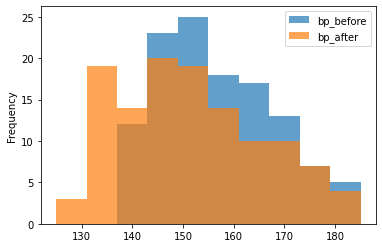

In [79]:
df[['bp_before', 'bp_after']].plot(kind='hist', alpha=0.7)

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, a média da amostra antes do tratamento é igual a média da amostra após tratamento.__
* __Alternative hypothesis (H1): u1 != u2, a média da amostra antes do tratamento é diferente da média da amostra após tratamento__

In [80]:
stats.ttest_rel(df.bp_before, df.bp_after)

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [81]:
stats.ttest_1samp(df.bp_before-df.bp_after, 0)

Ttest_1sampResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

Como o valor p está abaixo de 0,05 podemos rejeitar a hipótese nula, ou seja, que pressão arterial antes da intervenção tem a mesma média que a pressão arterial depois da intervenção!

# Two Sample T-Test

In [82]:
tb_bike = pd.read_csv('data/tb_bikesharing.csv')

In [83]:
tb_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<AxesSubplot:xlabel='cnt', ylabel='Density'>

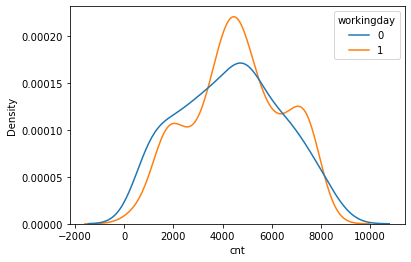

In [84]:
sns.kdeplot(data = tb_bike, x = 'cnt', hue = 'workingday', common_norm = False)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

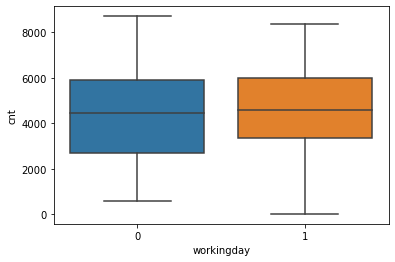

In [85]:
sns.boxplot(data = tb_bike, y = 'cnt', x = 'workingday')

In [86]:
tb_bike_fds = tb_bike[tb_bike['workingday'] == 0].copy()
tb_bike_sem = tb_bike[tb_bike['workingday'] == 1].copy()

### Assumption check 

- [ ]  The samples are independently and randomly drawn

**AND**

- [ ]  The distribution of the residuals between the two groups should follow the normal distribution

**AND**

- [ ]  The variances between the two groups are equal

**OR**

- [ ]  Approximately equal sample sizes

#### Normal?

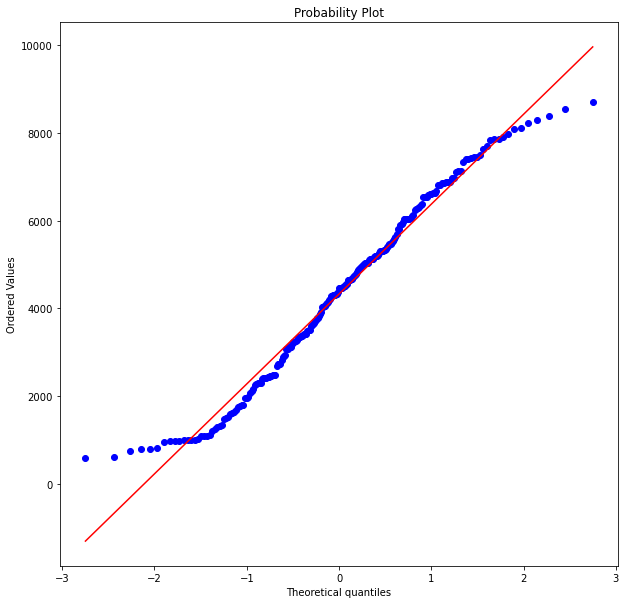

In [87]:
plt.figure(figsize=(10,10))
stats.probplot(tb_bike_fds['cnt'], plot=plt)
plt.show()

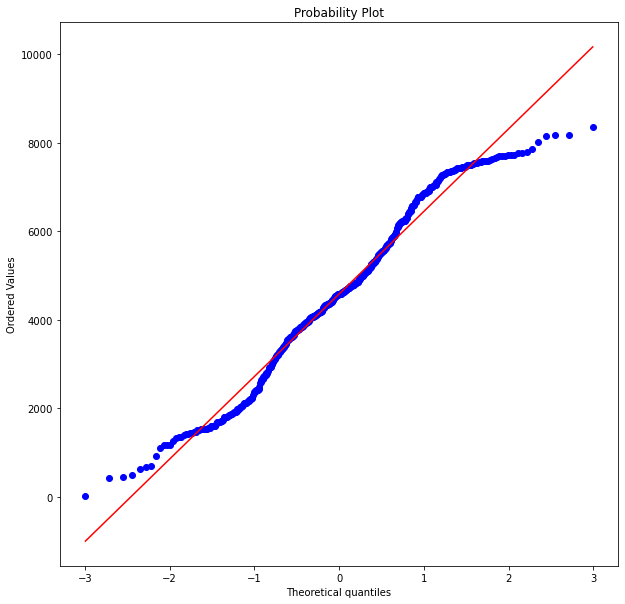

In [88]:
plt.figure(figsize=(10,10))
stats.probplot(tb_bike_sem['cnt'], plot=plt)
plt.show()

#### Equal variance or equal sample size?

In [89]:
tb_bike.groupby('workingday')['cnt'].var()

workingday
0    4.211284e+06
1    3.528445e+06
Name: cnt, dtype: float64

In [90]:
stats.levene(tb_bike_fds['cnt'], tb_bike_sem['cnt'])

LeveneResult(statistic=4.345365092777056, pvalue=0.037457323247039445)

In [91]:
tb_bike['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

Os grupos estão desbalanceados e a variância é diferente! Será que podemos utilizar um teste-t? Nas palavras de Richard Nixon: <i>"We could do it... but it would be wrong"</i>. Como temos amostras grandes (n>>30) podemos rebalancear os dados!

<i>Ressalva: se as amostras tem uma proporção de 1,5:1 (300:200 pontos, por exemplo), podemos proceder sem grandes problemas.</i>

In [92]:
tb_bike_sem_smp = tb_bike_sem.sample(231, random_state=42).reset_index(drop=True)

In [94]:
tb_bike_fds.shape

(231, 16)

In [95]:
stats.ttest_ind(tb_bike_fds['cnt'], tb_bike_sem_smp['cnt'])

Ttest_indResult(statistic=-0.7125247222345579, pvalue=0.476501159234212)

# One tailed-side t-test

A hipótese nula padrão no teste-t é que a média das duas amostra é igual. Rejeitar esta hipótese significa afirmar que a média de uma amostra é maior ou menor que a média da outra amostra. No entanto, muitas vezes nos interessa determinar o desvio da média da amostra apenas em um sentido. Neste podemos utilizar o teste-t unilateral - one a hipótese nula **H0** é que **A <= B** OU  **A >= B**.

Alguns exemplos práticos: uma indústria de fertilizantes quer saber se seu novo produto aumenta a produtividade por hectar de milho plantado, um agência de comunicação deseja saber se um novo banner aumenta a taxa de cliques em um website, um cientista de dados deseja saber se seu novo sistema de recomendação aumenta as vendas.

In [96]:
tb_bike['temp_classif'] = np.where(tb_bike['temp'] > np.mean(tb_bike['temp']), 1, 0)

<AxesSubplot:xlabel='temp_classif', ylabel='cnt'>

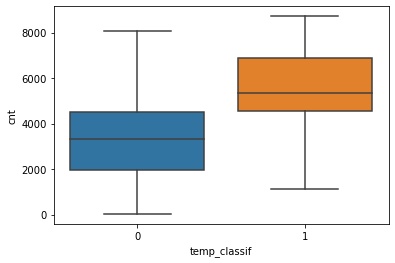

In [97]:
sns.boxplot(data = tb_bike, x = 'temp_classif', y = 'cnt')

In [98]:
tb_bike_quente = tb_bike[tb_bike['temp_classif'] == 1].copy()
tb_bike_frio = tb_bike[tb_bike['temp_classif'] == 0].copy()

In [99]:
tb_bike_frio.shape

(364, 17)

In [100]:
tb_bike_quente.shape

(367, 17)

In [104]:
stats.ttest_ind(tb_bike_quente['cnt'], tb_bike_frio['cnt'], alternative = 'greater')

Ttest_indResult(statistic=18.949601069584226, pvalue=1.0213389916765877e-65)

In [102]:
stats.ttest_ind(tb_bike_quente['cnt'], tb_bike_frio['cnt'])

Ttest_indResult(statistic=18.949601069584226, pvalue=2.0426779833531755e-65)

# ANOVA

E se quisermos comparar a média de mais de um grupo? O método ANOVA testa a hipótese nula onde todas as amostras foram feitas da mesma população, ou seja, que a média dos diferentes grupos é identica. Rejeitar a hipótese nula significa dizer que **pelo menos um grupo não é uma amostra da mesma população, ou seja, pelo menos a média de um grupo é diferente dos grupos restantes**

In [105]:
tb_bike['estacao'] = tb_bike['season'].map({
    1: 'Inverno',
    2: 'Primavera',
    3: 'Verão',
    4: 'Outono'
})

<AxesSubplot:xlabel='estacao', ylabel='cnt'>

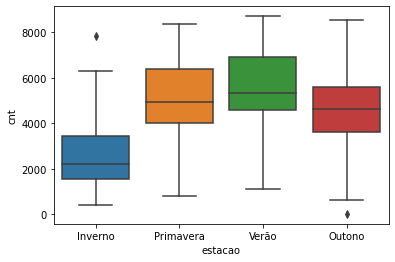

In [106]:
sns.boxplot(data = tb_bike, x = 'estacao', y = 'cnt')

In [107]:
tb_bike_season = [tb_bike[tb_bike['season'] == i]['cnt'] for i in range(1, 5)]

In [110]:
tb_bike_season[2]

171    4835
172    4507
173    4790
174    4991
175    5202
       ... 
626    4073
627    7591
628    7720
629    8167
630    8395
Name: cnt, Length: 188, dtype: int64

In [111]:
stats.f_oneway(tb_bike_season[0], tb_bike_season[1], tb_bike_season[2],
               tb_bike_season[3])

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

E se quisermos saber a proporção entre os grupos?

In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [113]:
tukey_fit = pairwise_tukeyhsd(endog = tb_bike['cnt'], groups = tb_bike['estacao'], alpha = 0.05)

In [114]:
tukey_fit.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Inverno,Outono,2124.0303,0.001,1697.6383,2550.4224,True
Inverno,Primavera,2388.1989,0.001,1965.3265,2811.0714,True
Inverno,Verão,3040.1706,0.001,2619.5349,3460.8063,True
Outono,Primavera,264.1686,0.3792,-160.4965,688.8337,False
Outono,Verão,916.1403,0.001,493.7025,1338.5781,True
Primavera,Verão,651.9717,0.001,233.0867,1070.8566,True
